# Chapter 3 Hydraulics: Hydraulic Pumps

1. [Introduction: Hydraulic Pumps](#1.-Introduction)
2. [Simulation: Pump Selection](#2.-Simulation)
3. [Simulation: Pump Design](#3.-Simulation)
4. [Self-Assessment](#4.-Self-Assessment)

## 1. Introduction

### 💧 Hydraulic Pumps: Concepts, Design, and System Integration

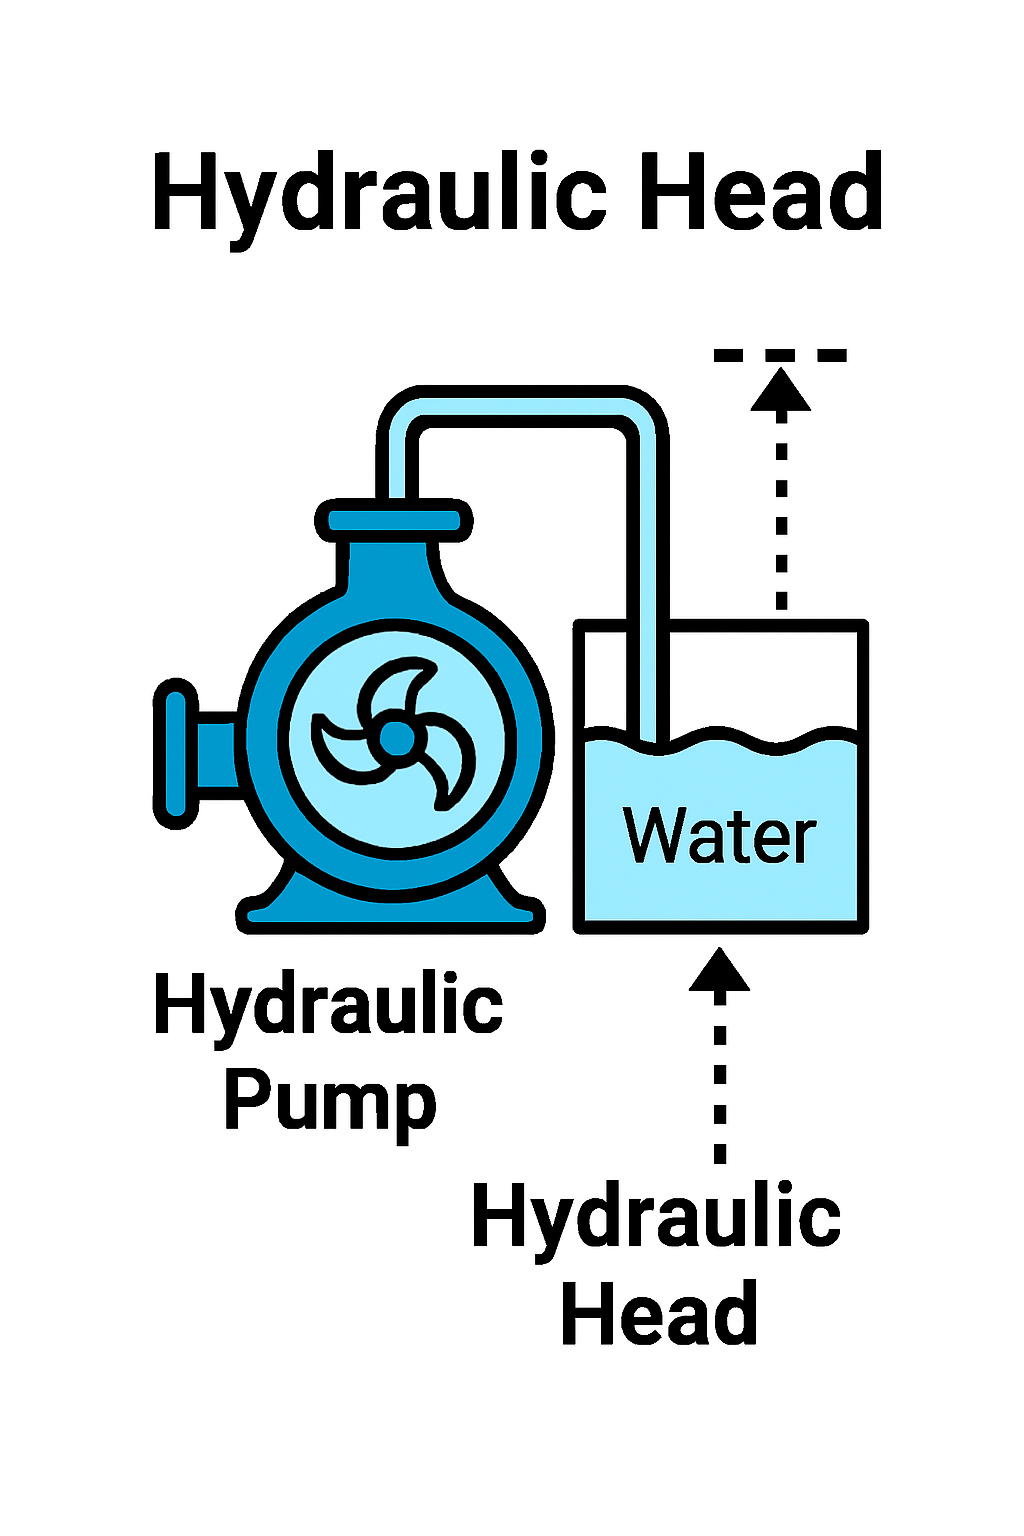

### 📘 Definition

A **hydraulic pump** converts mechanical energy into hydraulic energy by generating flow and pressure within a fluid system. It is a core component in applications such as water delivery, energy dissipation, and fluid power systems.

---

### ⚙️ Design Parameters

| Parameter        | Description                                                             |
|------------------|-------------------------------------------------------------------------|
| **Flow Rate (Q)**| Volume of fluid moved per unit time (e.g., L/min or m³/s)               |
| **Head (H)**     | Energy per unit weight of fluid, typically expressed in meters          |
| **Power (Pₖ)**   | Mechanical energy required to drive the pump                            |
| **Efficiency (η)**| Ratio of hydraulic power to shaft input power                          |
| **Fluid Properties** | Density, viscosity, temperature, and presence of solids              |
| **NPSH**         | Net Positive Suction Head required to avoid cavitation                  |

---

### 🔍 Types of Hydraulic Pumps

| Pump Type                | Description & Use Case                                         |
|--------------------------|---------------------------------------------------------------|
| **Centrifugal Pump**      | Rotodynamic; high flow, low pressure; ideal for clean water   |
| **Gear Pump**             | Positive displacement; suitable for viscous fluids            |
| **Vane Pump**             | Moderate pressure and compact footprint                       |
| **Piston Pump**           | High pressure applications; variable displacement             |
| **Diaphragm Pump**        | For slurries, chemicals, and solids-laden fluids              |

---

### 🧪 Pump Selection Guidelines

- Match pump type with fluid characteristics and system duty
- Consider pressure, flow rate, efficiency, and spatial constraints
- Use manufacturer curves and selection charts
- Verify compatibility with solids, viscosity, and corrosion

---

### 📈 Pump Characteristic Curve

- Plot of **Head vs. Flow Rate** for a pump at constant speed
- Includes:
  - **Best Efficiency Point (BEP)**
  - **Power consumption**
  - **NPSHr (required)**
- Shape: head decreases as flow increases

---

### 📊 System Curve

- Represents total **head loss** in the system as a function of flow
- Components:
  - **Static head** (elevation gain/loss)
  - **Friction head** (pipe and fittings resistance)
- Curve rises with increasing flow

---

### 🎯 Selection of Operating Point

- Found at the **intersection** of pump curve and system curve
- Should be near **BEP** for optimal:
  - Efficiency
  - Longevity
  - Noise/vibration control
- Consider **POR** and **AOR** per ANSI/HI guidelines

---

### 🧮 Net Positive Suction Head (NPSH)

| Term        | Definition                                                    |
|-------------|---------------------------------------------------------------|
| **NPSHa**   | Available suction head in the system                          |
| **NPSHr**   | Minimum required NPSH by the pump to prevent cavitation       |
| **Cavitation Risk** | Occurs if NPSHa < NPSHr — leads to vapor bubbles & damage |

> Ensure NPSHa ≥ NPSHr + margin for safe operation.

---

### 🔗 Pumps in Series vs. Pumps in Parallel

| Configuration       | Combined Effect                  | Typical Application                     |
|---------------------|----------------------------------|------------------------------------------|
| **Series**          | Adds **head**, flow remains constant | High elevation or pressure requirements  |
| **Parallel**        | Adds **flow**, head remains constant | High demand or variable flow systems     |

- In **series**: $( H_{total} = H_1 + H_2 $)
- In **parallel**: $( Q_{total} = Q_1 + Q_2 $)

---

## 2. Simulation

### 💧 Summary: Interactive Hydraulic Pump Design & Selection Tool

### 📘 What It Is
This Jupyter-based Python tool estimates hydraulic pump power requirements and suggests suitable pump types. It uses `ipywidgets` for interactive input and real-time output display.

---

### ⚙️ How It Works

### 🔧 Design Calculator
- Computes **flow rate** in m³/s from user input (L/min)
- Calculates **required power** in kW based on flow rate, head, fluid density, gravity, and efficiency
- Optionally estimates **outlet pressure** in kPa

### 🔍 Pump Selector
- Recommends pump type based on:
  - Flow rate and head
  - Fluid type and viscosity
  - Presence of solids
  - Space constraints

---

### 🧭 Inputs and Parameters

| Parameter         | Purpose                                  |
|------------------|------------------------------------------|
| Q (L/min)         | Flow rate input                          |
| H (m)             | Head (elevation gain)                    |
| Efficiency        | Pump efficiency (0.5–0.95)               |
| Density (ρ)       | Fluid density (kg/m³)                    |
| Gravity (g)       | Gravitational constant (m/s²)            |
| Fluid Type        | Water, Oil, Coolant                      |
| Viscosity (cP)    | Fluid viscosity                          |
| Solids Present    | Checkbox for abrasive or particulate flow|
| Space Limited     | Checkbox for vertical installation logic |

---

### 📊 Interpreting Output

| Output Field             | Meaning                                             |
|--------------------------|-----------------------------------------------------|
| Flow Rate (m³/s)         | Converted flow for power calculation                |
| Required Power (kW)      | Energy needed to deliver fluid at defined head      |
| Outlet Pressure (kPa)    | Estimated static pressure at pump outlet            |
| Pump Selection Advice    | Suggests most suitable pump type for given scenario |

---

This tool is useful for teaching design principles, guiding preliminary selection in water systems, or exploring parametric impacts on pump sizing.

In [6]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, Markdown

# 🔧 Design calculator
def hydraulic_pump_design(Q_lpm, H_m, efficiency=0.75, rho=1000, g=9.81, include_pressure=True):
    Q_m3s = Q_lpm / 1000 / 60
    power_kW = (rho * g * Q_m3s * H_m) / (efficiency * 1000)
    pressure_kPa = rho * g * H_m / 1000 if include_pressure else None

    md = f"""
### 💡 Hydraulic Pump Design Results

- **Flow Rate**: {Q_lpm:.1f} L/min → {Q_m3s:.5f} m³/s  
- **Head**: {H_m:.1f} m  
- **Efficiency**: {efficiency:.2f}  
- **Fluid Density (ρ)**: {rho:.1f} kg/m³  
- **Gravity (g)**: {g:.2f} m/s²  
- ⚡ **Required Power**: {power_kW:.2f} kW  
- 🧪 **Outlet Pressure**: {pressure_kPa:.2f} kPa
"""
    display(Markdown(md))

# 🔍 Pump selector
def recommend_pump_type(flow_lpm, head_m, fluid_type='Water', temperature=25,
                        viscosity_cP=1.0, solids=False, space_limited=False):
    if viscosity_cP > 100 or fluid_type.lower() == 'oil':
        return "🔧 Recommend: Screw or Gear Pump (Viscous Fluids)"
    elif head_m > 100:
        return "🔧 Recommend: Multistage Centrifugal Pump (High Head)"
    elif solids:
        return "🔧 Recommend: Slurry or Diaphragm Pump (Solids Handling)"
    elif flow_lpm < 50:
        return "🔧 Recommend: Peristaltic or Piston Pump (Low Flow)"
    elif space_limited:
        return "🔧 Recommend: Vertical Inline Pump (Compact Footprint)"
    else:
        return "🔧 Recommend: Standard Centrifugal Pump (General Use)"

# 🎛️ Widgets
Q_slider = widgets.FloatSlider(value=500, min=10, max=2000, step=10, description='Flow Q (L/min):')
H_slider = widgets.FloatSlider(value=35, min=1, max=150, step=1, description='Head H (m):')
eff_slider = widgets.FloatSlider(value=0.75, min=0.5, max=0.95, step=0.01, description='Efficiency:')
rho_slider = widgets.FloatSlider(value=1000, min=950, max=1200, step=10, description='Density ρ:')
g_slider = widgets.FloatSlider(value=9.81, min=9.0, max=10.0, step=0.01, description='Gravity g:')

fluid_dropdown = widgets.Dropdown(options=['Water', 'Oil', 'Coolant'], value='Water', description='Fluid:')
viscosity_slider = widgets.FloatSlider(value=1.0, min=0.5, max=500.0, step=1.0, description='Viscosity (cP):')
solids_toggle = widgets.Checkbox(value=False, description='Solids Present')
space_toggle = widgets.Checkbox(value=False, description='Space Limited')

run_btn = widgets.Button(description='Calculate & Recommend')

def on_click(b):
    hydraulic_pump_design(Q_slider.value, H_slider.value, eff_slider.value,
                          rho_slider.value, g_slider.value)

    recommendation = recommend_pump_type(flow_lpm=Q_slider.value,
                                         head_m=H_slider.value,
                                         fluid_type=fluid_dropdown.value,
                                         viscosity_cP=viscosity_slider.value,
                                         solids=solids_toggle.value,
                                         space_limited=space_toggle.value)
    display(Markdown(f"### 🧭 Pump Selection Advice\n{recommendation}"))

run_btn.on_click(on_click)

# 📦 Display interface
display(Q_slider, H_slider, eff_slider, rho_slider, g_slider,
        fluid_dropdown, viscosity_slider, solids_toggle, space_toggle, run_btn)

FloatSlider(value=500.0, description='Flow Q (L/min):', max=2000.0, min=10.0, step=10.0)

FloatSlider(value=35.0, description='Head H (m):', max=150.0, min=1.0, step=1.0)

FloatSlider(value=0.75, description='Efficiency:', max=0.95, min=0.5, step=0.01)

FloatSlider(value=1000.0, description='Density ρ:', max=1200.0, min=950.0, step=10.0)

FloatSlider(value=9.81, description='Gravity g:', max=10.0, min=9.0, step=0.01)

Dropdown(description='Fluid:', options=('Water', 'Oil', 'Coolant'), value='Water')

FloatSlider(value=1.0, description='Viscosity (cP):', max=500.0, min=0.5, step=1.0)

Checkbox(value=False, description='Solids Present')

Checkbox(value=False, description='Space Limited')

Button(description='Calculate & Recommend', style=ButtonStyle())

## 3. Simulation

### 💧 Summary: Pump Flow Capacity Estimator (Interactive Tool)

### 📘 What It Is
This Python-based Jupyter tool estimates flow capacity and evaluates suction safety for typical pumps based on embedded performance curves. It allows users to interactively define system elevation, pipe conditions, and fluid properties.

---

### ⚙️ What It Does

- Uses embedded pump models with head–flow equations \( H = a - bQ^2 \)
- Computes static head based on suction and discharge elevations
- Solves for operating flow rate where pump head equals system head
- Assesses NPSH safety by comparing NPSHa vs. NPSHr

---

### 🧮 How It Works

| Module             | Function                                                                 |
|--------------------|--------------------------------------------------------------------------|
| `pump_models`       | Defines typical pumps with parameters `a`, `b`, and `NPSHr`              |
| `find_operating_point()` | Calculates flow rate \( Q_{opt} \) that satisfies \( H_{pump} = H_{system} \) |
| `check_npsh()`      | Computes Net Positive Suction Head Available (NPSHa) and checks safety margin |
| Widgets             | Let users input suction/discharge elevations, pipe diameter, losses, vapor head |

---

### 📊 Input Parameters

| Input                 | Meaning                                               |
|-----------------------|--------------------------------------------------------|
| **Pump Model**        | Selects curve parameters for a predefined pump         |
| **Suction Elevation** | Elevation of fluid source (m)                          |
| **Discharge Elevation** | Elevation of output point (m)                       |
| **Pipe Diameter**     | Size of delivery pipe (used for display)              |
| **Vapor Head**        | Vapor pressure head of fluid (used in NPSH calc)      |
| **Pipe Loss**         | Suction-side head loss (m)                             |

---

### 📈 How to Interpret Outputs

| Output Field            | Meaning                                                            |
|-------------------------|---------------------------------------------------------------------|
| **Static Head**         | Elevation difference driving system resistance                     |
| **Pump Head at Operating Point** | Required pump head when flow equals system head           |
| **Flow Capacity**       | Calculated flow rate where pump matches system resistance (L/s)    |
| **NPSHa vs. NPSHr**     | Compares available and required suction head for cavitation safety |
| **Safety Margin**       | Buffer zone above NPSHr; ≥0.5 m is typically safe                  |

---

✅ Use this tool to determine feasibility, pump suitability, and suction safety across design scenarios. You can easily extend it with real pump catalog data, friction losses, or visual curve plotting.

In [7]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, Markdown

# Sample pump models with H_pump = a - b*Q²
pump_models = {
    'Model A - Centrifugal': {'a': 40, 'b': 0.004, 'NPSHr': 2.5},
    'Model B - Multistage': {'a': 70, 'b': 0.002, 'NPSHr': 4.0},
    'Model C - Low Head, High Flow': {'a': 25, 'b': 0.006, 'NPSHr': 1.8}
}

# System curve: Static head only
def system_head(Q, suction_elev, discharge_elev):
    return discharge_elev - suction_elev

# Solve for operating point Q_opt (H_pump = H_system)
def find_operating_point(pump, suction_elev, discharge_elev):
    a, b = pump['a'], pump['b']
    static_head = discharge_elev - suction_elev
    delta_H = a - static_head
    if delta_H <= 0:
        return 0, a, static_head, False
    Q_opt = np.sqrt(delta_H / b)
    H_pump = a - b * Q_opt**2
    return Q_opt, H_pump, static_head, True

# NPSH safety check
def check_npsh(pump, vapor_head, suction_elev, pipe_loss, atm_head=10.3):
    NPSHa = atm_head + suction_elev - pipe_loss - vapor_head
    margin = NPSHa - pump['NPSHr']
    safe = margin >= 0.5
    return round(NPSHa, 2), round(pump['NPSHr'], 2), round(margin, 2), safe

# Widgets
pump_selector = widgets.Dropdown(options=list(pump_models.keys()), description='Pump Model:')
suction_slider = widgets.FloatSlider(value=2, min=-5, max=10, step=0.5, description='Suction Elev (m):')
discharge_slider = widgets.FloatSlider(value=30, min=0, max=100, step=1, description='Discharge Elev (m):')
pipe_diam_slider = widgets.FloatSlider(value=0.2, min=0.05, max=1.0, step=0.01, description='Pipe Diameter (m):')
vapor_head_slider = widgets.FloatSlider(value=0.3, min=0.2, max=1.5, step=0.05, description='Vapor Head (m):')
pipe_loss_slider = widgets.FloatSlider(value=0.6, min=0.1, max=2.0, step=0.1, description='Suction Pipe Loss (m):')
run_btn = widgets.Button(description='Estimate Flow Capacity')

# Callback
def on_click(b):
    pump = pump_models[pump_selector.value]
    Q_opt, H_pump, H_sys, feasible = find_operating_point(pump, suction_slider.value, discharge_slider.value)
    NPSHa, NPSHr, margin, safe = check_npsh(pump, vapor_head_slider.value, suction_slider.value, pipe_loss_slider.value)

    if not feasible:
        md = "### ❌ No feasible operating point — system head exceeds pump capability."
    else:
        md = f"""
### 🚰 Estimated Pump Flow Capacity

- **Pump Model**: {pump_selector.value}  
- **Static Head**: {H_sys:.2f} m  
- **Pump Head at Operating Point**: {H_pump:.2f} m  
- **Flow Capacity**: {Q_opt:.2f} L/s  
- **Pipe Diameter**: {pipe_diam_slider.value:.2f} m  

### 🧪 NPSH Check

- **NPSHa**: {NPSHa:.2f} m  
- **NPSHr**: {NPSHr:.2f} m  
- **Safety Margin**: {margin:.2f} m  
- {'✅ Cavitation risk is low' if safe else '⚠️ Cavitation risk detected — redesign advised'}
"""
    display(Markdown(md))

run_btn.on_click(on_click)

# Display UI
display(pump_selector, suction_slider, discharge_slider,
        pipe_diam_slider, vapor_head_slider, pipe_loss_slider, run_btn)

Dropdown(description='Pump Model:', options=('Model A - Centrifugal', 'Model B - Multistage', 'Model C - Low H…

FloatSlider(value=2.0, description='Suction Elev (m):', max=10.0, min=-5.0, step=0.5)

FloatSlider(value=30.0, description='Discharge Elev (m):', step=1.0)

FloatSlider(value=0.2, description='Pipe Diameter (m):', max=1.0, min=0.05, step=0.01)

FloatSlider(value=0.3, description='Vapor Head (m):', max=1.5, min=0.2, step=0.05)

FloatSlider(value=0.6, description='Suction Pipe Loss (m):', max=2.0, min=0.1)

Button(description='Estimate Flow Capacity', style=ButtonStyle())

## 4. Self-Assessment

### 🧠 Hydraulic Pump Design & Selection: Reflective, Conceptual & Quiz Questions


### Pump Fundamentals
- What is the physical relationship between flow rate, head, and power in hydraulic systems?
- Why does fluid density and gravity influence both pressure and power requirements?
- How does efficiency affect the total energy demand of a hydraulic pump?

### Pump Selection Logic
- What conditions would justify the use of a positive displacement pump instead of a centrifugal pump?
- Why is head-based selection critical for identifying multistage vs. standard centrifugal pumps?
- In what scenarios are peristaltic or piston pumps preferred?

---

### 💭 Reflective Questions

- As you manipulated the sliders, which input parameter had the most impact on calculated power? Why?
- How does fluid viscosity affect pump type selection in practical field applications?
- Have you ever worked on a system with limited installation space? What trade-offs were necessary in pump selection?
- Think of a field situation where cavitation was observed—how might NPSH considerations have prevented it?
- How confident do you feel explaining the link between design parameters and system efficiency to learners?

---

### Design Calculations

**Q1. Increasing flow rate while keeping head and efficiency constant will:**  
- A. Decrease required power  
- B. Increase required power ✅  
- C. Not affect power  
- D. Reduce outlet pressure  

**Q2. If head = 30 m and fluid density = 1000 kg/m³, what is approximate outlet pressure?**  
- A. 2.94 kPa  
- B. 29.43 kPa ✅  
- C. 3.00 Pa  
- D. 294.3 kPa  

**Q3. Which combination of properties suggests use of a screw or gear pump?**  
- A. High head and low flow  
- B. Water and low viscosity  
- C. Oil and viscosity > 100 cP ✅  
- D. Large solids and space constraints  

### Selection Conditions

**Q4. A system with 45 L/min flow and solids present would best use:**  
- A. Vertical Inline Pump  
- B. Standard Centrifugal Pump  
- C. Diaphragm or Slurry Pump ✅  
- D. Multistage Centrifugal Pump  

**Q5. Which parameter does NOT influence outlet pressure directly?**  
- A. Fluid density  
- B. Head  
- C. Viscosity ✅  
- D. Gravity  

---

### 💧 Problem 1: Power Calculation

A water distribution system requires a flow of **750 L/min** and an elevation gain of **22 m**. The pump operates at **78% efficiency**.

**Tasks:**
- Convert flow rate to m³/s
- Estimate required input power in kW using:  
  $( P = \frac{ρgQH}{η} $)
- Compute outlet pressure in kPa assuming ρ = 1000 kg/m³

---

### 🔍 Problem 2: NPSH Evaluation

For the same system:
- Suction tank is 3.5 m above pump centerline
- Pipe losses before pump = 1.2 m
- Vapor pressure head at 25°C = 0.3 m

**Tasks:**
- Calculate NPSHa:  
  $( NPSHa = Z + P_{atm} - h_{loss} - h_{vapor} $)
- If pump’s NPSHr = 2.8 m, will cavitation occur?

---

### 📈 Problem 3: Operating Point Selection

Use the simplified system curve:  
$( H_{sys} = 10 + 0.002Q^2 $)

Pump curve:  
$( H_{pump} = 30 - 0.0015Q^2 $)

**Tasks:**
- Graph both curves on the same axis (Q vs. H)
- Determine operating point (intersection)
- Identify if operating point falls near BEP

---

### 🔗 Problem 4: Pump Configuration Comparison

Design two configurations for a site needing **1800 L/min** and **65 m** head.

**Tasks:**
1. Choose pump type(s) for each configuration:
   - **Single pump**
   - **Two pumps in series**
   - **Two pumps in parallel**
2. Compute head and flow for each configuration
3. Compare power requirements and NPSH conditions

---

### 🧠 Challenge Scenario

You are designing a pump station for a slurry discharge line with:
- Flow: 45 L/min
- Head: 12 m
- Fluid: Viscous + solid particles
- Limited installation space

**Tasks:**
- Select pump type and justify choice
- Describe expected pump curve shape
- Identify risks to operation and mitigation strategies

---

### ✍️ Reflection Prompt

- How does fluid type influence pump selection and operating safety?
- What trade-offs do you make between energy efficiency and system flexibility?
- Where might you prioritize NPSH safety over pump cost?

---